# Grupo 4

*   Alex Riquelme
*   Camila Aguilar
*   Camila Varas
*   Fabian Cuevas
*   Claudia Araya








# CONTEXTO

Crear un programa utilizando la librería que realice lo siguiente:

### 1) Crear el siguiente DataFrame indexado:

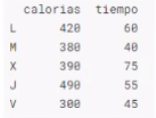


In [ ]:
#Se importa la librería pandas con el alias pd
import pandas as pd
#Se crea el diccionario datos, con las etiquetas 'calorías' y 'tiempo'
datos = {'calorias': [420, 380, 390, 490, 300],
         'tiempo': [60, 40, 75, 55, 45]}
#Se asigna la variable df que contendrá el DataFrame del diccionario datos, asignando los índices de los días entre semana
df = pd.DataFrame(datos, index= ['L', 'M', 'X', 'J', 'V'])
#Se utiliza la función display() para mostrar de manera más legible el df
display(df)

,calorias,tiempo
L,420,60
M,380,40
X,390,75
J,490,55
V,300,45


### 2) Calcular la media, mediana, desviación típica de ambas columnas

In [ ]:
#Se llaman las funciones de pandas para que el DataFrame haga los cálculos de media, mediana y desviación estándar
media = df.mean()
mediana = df.median()
desviacion = df.std()
#Se utiliza la función de pandas concat para agrupar las distintas variables del DataFrame df
calculos = pd.concat([media, mediana, desviacion], axis = 1)
#Se aplica la función columns para agregar los nombres de las columnas
calculos.columns = ['media', 'mediana', 'desviación']
#Se despliegan en pantalla los resultados
display(calculos)

,media,mediana,desviación
calorias,396.0,390.0,68.774995
tiempo,55.0,55.0,13.693064


### 3) Añadir otra columna booleana al DataFrame
para ver si se ha cumplido el reto de quemar más de 400 calorías por hora. La nueva columna debe generarse aplicando una fórmula a las otras columnas

In [ ]:
#Al df se le agrega la columna booleana reto, estableciendo la relación que debe cumplir,
#siendo true al ser mayor a la relación definida
df['reto'] = (df['calorias'] / df['tiempo']) > (400 / 60)
#Se despliega el nuevo DataFrame
display(df)


,calorias,tiempo,reto
L,420,60,True
M,380,40,True
X,390,75,False
J,490,55,True
V,300,45,False


### 4) Filtrar el DataFrame
y devolver otro DataFrame con las filas pares que cumplan que el número de calorías es mayor a 400.

In [ ]:
#Se define el filtro para el DataFrame original, con la función iloc para seleccionar todas las filas en
#intervalos de 2. Es decir, seleccionará la primera fila, la tercera fila, la quinta fila, y así sucesivamente
df_filtrado = df.iloc[::2][(df['calorias'] > 400)]

#Se muestra el DataFrame filtrado
display(df_filtrado)

<ipython-input-12-1b2abff1bec2>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtrado = df.iloc[::2][(df['calorias'] > 400)]


,calorias,tiempo,reto
L,420,60,True


5)Crear a partir del DataFrame una serie con los porcentajes de días que se ha conseguido el reto y los que no

In [ ]:
#Se crea el nuevo DataFrame. El anterior se agrupa con la función groupby por la columna reto y la función count()
#los cuenta
df2 = df.groupby(['reto']).count()
#Se despliega display() para la comprensión del primer paso
display(df2)
#Se aplica al df2 el método index, para aplicar mediante la función map(), se recorre el índice del DataFrame y si es true
#se mapea la cadena Cumplidos y si es false No Cumplidos
df2.index = df2.index.map({True : 'Cumplidos', False : 'No cumplidos'})
#Se despliega display() para la comprensión del segundo paso
display(df2)
#Se calculan los porcentajes respecto al total
df2['%'] = 100 * df2['calorias'] / df2['calorias'].sum()
#Se despliega display() para la comprensión del tercer paso
display(df2)
#Se crea la serie con los porcentajes
serie_porcentajes = df2['%']

#Se muestra la serie
display(serie_porcentajes)

,calorias,tiempo
reto,,
False,2,2
True,3,3


,calorias,tiempo
reto,,
No cumplidos,2,2
Cumplidos,3,3


,calorias,tiempo,%
reto,,,
No cumplidos,2,2,40.0
Cumplidos,3,3,60.0


reto
No cumplidos    40.0
Cumplidos       60.0
Name: %, dtype: float64

6) Crear un gráfico como el de más abajo que muestre la progresión de las calorías y tiempo durante la semana.

Importación de la librería pyplot

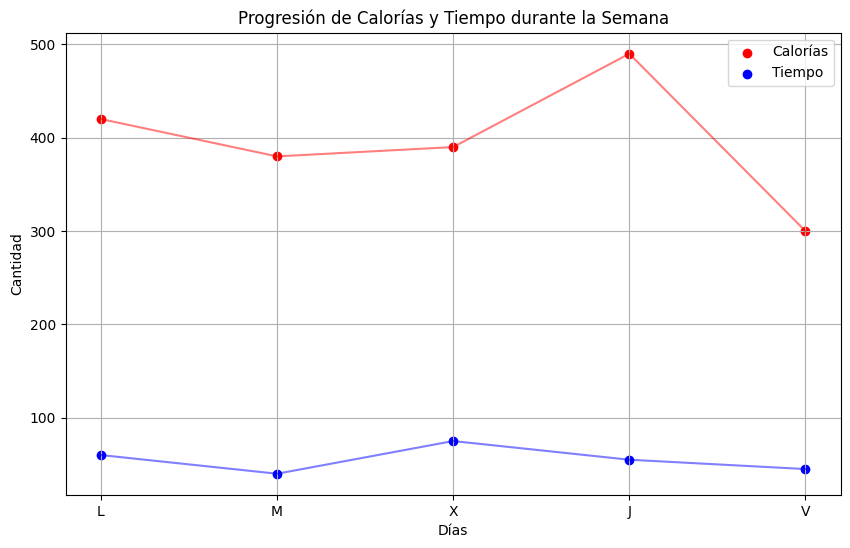

In [ ]:
#Se importa la librería matplotlib con su módulo pyplot, para generar gráficos y editarlos
import matplotlib.pyplot as plt

#Se definen las variables del gráfico
dias = df.index
calorias = df['calorias']
tiempo = df['tiempo']

#Se genera el gráfico de dispersión con dos curvas y se definen sus características
plt.figure(figsize=(10, 6))
plt.scatter(dias, calorias, color='red', label='Calorías')
plt.plot(dias, calorias, color='red', alpha=0.5)
plt.scatter(dias, tiempo, color='blue', label='Tiempo')
plt.plot(dias, tiempo, color='blue', alpha=0.5)

#Se personaliza el gráfico en cuanto a título, ejes y leyendas
plt.title('Progresión de Calorías y Tiempo durante la Semana')
plt.xlabel('Días')
plt.ylabel('Cantidad')
plt.legend()
plt.grid(True)

#Se muestra o plotea el gráfico
plt.show()


El gráfico anterior nos indica que se mantiene el gasto calórico durante los días lunes hasta el miércoles, luego el día jueves tiene un peak y el día viernes disminuye a un mínimo de 300 calorías aproximadamente.

Suponemos que se está midiendo el gasto calórico de una actividad o ejercicio en un tiempo determinado, y podemos indicar que el día martes, jueves y viernes en relación al tiempo fueron los menores, y el día miércoles fue mayor el tiempo de dedicación.

Concluimos que no existe una relación entre el tiempo y las calorías quemadas, ya que el martes y el viernes son similares en tiempo pero distintos en el gasto calórico, por lo que se sugiere seguir investigando.   